#  Importing the Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset


In [3]:
dataset = pd.read_csv('rabbit_disease.csv')
X = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values

In [4]:
dataset.head()

,Time,Compound1,Compound2,Compound3,Compound4,Compound5,Compound6,Compound7,Compound8,Compound9,...,Compound21,Compound22,Compound23,Compound24,Compound25,Compound26,Compound27,Compound28,Compound29,hasDisease
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [5]:
dataset.isnull().sum()

Time          0
Compound1     0
Compound2     0
Compound3     0
Compound4     0
Compound5     0
Compound6     0
Compound7     0
Compound8     0
Compound9     0
Compound10    0
Compound11    0
Compound12    0
Compound13    0
Compound14    0
Compound15    0
Compound16    0
Compound17    0
Compound18    0
Compound19    0
Compound20    0
Compound21    0
Compound22    0
Compound23    0
Compound24    0
Compound25    0
Compound26    0
Compound27    0
Compound28    0
Compound29    0
hasDisease    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   Compound1   284807 non-null  float64
 2   Compound2   284807 non-null  float64
 3   Compound3   284807 non-null  float64
 4   Compound4   284807 non-null  float64
 5   Compound5   284807 non-null  float64
 6   Compound6   284807 non-null  float64
 7   Compound7   284807 non-null  float64
 8   Compound8   284807 non-null  float64
 9   Compound9   284807 non-null  float64
 10  Compound10  284807 non-null  float64
 11  Compound11  284807 non-null  float64
 12  Compound12  284807 non-null  float64
 13  Compound13  284807 non-null  float64
 14  Compound14  284807 non-null  float64
 15  Compound15  284807 non-null  float64
 16  Compound16  284807 non-null  float64
 17  Compound17  284807 non-null  float64
 18  Compound18  284807 non-null  float64
 19  Co

    Dataset does not contain null values and categorical variables.

In [35]:
dataset['hasDisease'].value_counts()

0    284315
1       492
Name: hasDisease, dtype: int64

0 --> No Disease

1 --> Disease

0    0.998273
1    0.001727
Name: hasDisease, dtype: float64


<AxesSubplot:>

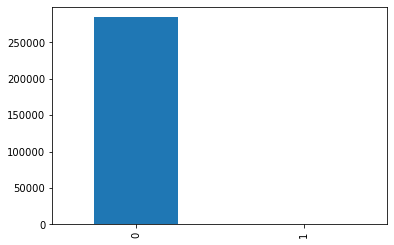

In [37]:
print(dataset['hasDisease'].value_counts(normalize = True))
pd.value_counts(dataset['hasDisease']).plot(kind = "bar")


The SMOTE oversampling technique is used as the proportion of the target variable is imbalanced.

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm , y_sm = smote.fit_resample(X , y)

In [10]:
print("TARGET DISTRIBTUION BEFORE SMOTE")
print(pd.DataFrame(y).value_counts())
print("====================================")
print("TARGET DISTRIBTUION AFTER SMOTE")
print(pd.DataFrame(y_sm).value_counts())

TARGET DISTRIBTUION BEFORE SMOTE
0    284315
1       492
dtype: int64
TARGET DISTRIBTUION AFTER SMOTE
0    284315
1    284315
dtype: int64


In [11]:
dataset.shape

(284807, 31)

# Splitting the dataset into training and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm , y_sm , test_size = 0.2 , stratify = y_sm)

In [13]:
print(X_train)

[[ 1.62237000e+05 -8.24718973e-01  7.09340325e-01 ... -6.73810510e-02
   1.82287640e-02  5.95000000e+00]
 [ 2.93646560e+04 -1.19216814e+01  7.02439244e+00 ...  7.92499438e-01
   1.16119008e-01  5.87405581e+01]
 [ 8.77091747e+03 -1.93626627e+00  3.69628714e+00 ...  4.17486742e-01
   2.19576495e-01  1.00000000e+00]
 ...
 [ 1.52144000e+05  1.91961142e+00 -7.31769033e-01 ... -1.71600646e-01
  -8.33809520e-02  1.15400000e+02]
 [ 3.81580000e+04 -1.23771497e+00  1.01673071e+00 ... -7.01225420e-02
  -5.70139990e-02  2.84000000e+01]
 [ 7.62117369e+03  5.55701476e-01  2.93329973e+00 ...  5.72913603e-01
   2.37722401e-01  1.00000000e+00]]


In [14]:
print(y_train)

[0 1 1 ... 0 0 1]


In [15]:
print(X_test)

[[ 3.61512634e+04 -5.54768132e+00  5.67990305e+00 ...  3.28965020e-01
   2.41009572e-01  1.03472810e+02]
 [ 8.41828908e+04 -1.81063047e+00  1.87458925e+00 ...  1.26338629e+00
   7.97351668e-01  4.72279304e+02]
 [ 6.15530000e+04  1.24567382e+00  1.66975020e-01 ... -3.58663150e-02
   1.84945730e-02  8.99000000e+00]
 ...
 [ 1.14829000e+05  2.10810835e+00 -2.07739554e-01 ... -9.39989840e-02
  -9.19453790e-02  7.60000000e-01]
 [ 3.43570000e+04  1.13271419e+00  1.99319983e-01 ...  3.96248830e-02
   3.31245520e-02  1.47100000e+01]
 [ 9.38959844e+04 -1.16811241e+01  7.82833782e+00 ... -8.27669210e-01
  -1.98933154e-02  1.33631803e+02]]


In [16]:
print(y_test)

[1 1 0 ... 0 0 1]


# Feature Scaling

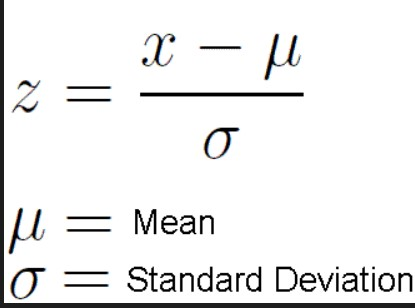

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 1.54550691  0.3030283  -0.33060199 ... -0.15659686 -0.05583577
  -0.40397702]
 [-1.21294171 -1.73624979  1.40817564 ...  0.74758774  0.17696999
  -0.1659973 ]
 [-1.64047063  0.09876032  0.49181978 ...  0.35325305  0.42301595
  -0.42629161]
 ...
 [ 1.33597481  0.80735125 -0.72739502 ... -0.26618623 -0.29748729
   0.08942333]
 [-1.03039065  0.22713242 -0.24596555 ... -0.15947961 -0.23478055
  -0.30277247]
 [-1.66433947  0.55670683  0.28173989 ...  0.51668806  0.46617114
  -0.42629161]]


In [19]:
print(X_test)       

[[-1.07205078 -0.56490594  1.03798581 ...  0.26017037  0.47398879
   0.03565559]
 [-0.07490741  0.12184829 -0.00976398 ...  1.24273637  1.79709964
   1.69823441]
 [-0.54470714  0.68350239 -0.47993609 ... -0.12345838 -0.05520361
  -0.3902727 ]
 ...
 [ 0.56131014  0.84199115 -0.58310948 ... -0.18458625 -0.31785549
  -0.42737352]
 [-1.10929994  0.66274391 -0.47103027 ... -0.0440776  -0.02041012
  -0.36448696]
 [ 0.12673778 -1.69204281  1.62953284 ... -0.95605779 -0.14649893
   0.17161226]]


# Training the Logistic Regression model on the Training set

Target variables i.e 'y' is binary. So, logistic regression is used.

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 1000) #max_iter: Maximum number of iterations taken for the solvers to converge.
classifier.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

# Predicting the test set results

In [21]:
y_test_pred = classifier.predict(X_test)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred), 1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [22]:
y_train_pred = classifier.predict(X_train)
print(np.concatenate((y_train_pred.reshape(len(y_train_pred), 1),y_train.reshape(len(y_train),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


# Confusion Matrix and Accuracy Score


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm = confusion_matrix(y_test , y_test_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[56386   477]
 [ 1813 55050]]


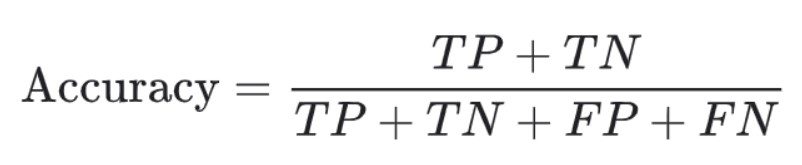

In [28]:
accuracy_score(y_test,y_test_pred)*100

97.98638833687987

In [29]:
accuracy_score(y_train,y_train_pred)*100

98.02265972600811

The accuracy scores on test and training data are almost equal. So, model is not over-fitted.

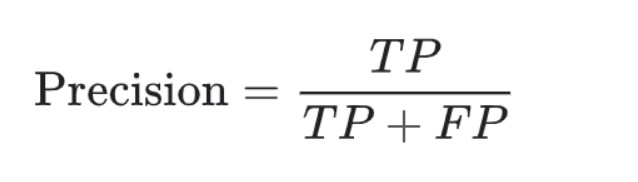

   Precision: What proportion of positive identifications was actually correct? 

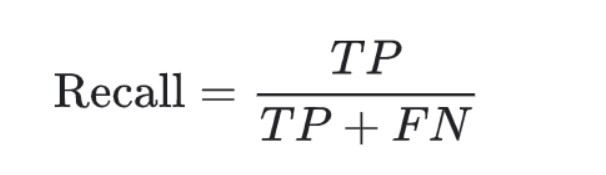

   Recall: What proportion of actual positives was identified correctly?

In [31]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

